# Loading the data

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/barack_obamas_playlist_2019-2023_clean_enriched.csv")

#Data Exploration

In [ ]:
df.shape

(257, 25)

In [ ]:
print(df.columns)

Index(['track_id', 'track_name', 'track_album_name', 'gender', 'track_artist',
       'artist_id', 'artist_followers', 'artist_popularity',
       'track_album_release_year', 'duration_min', 'track_popularity',
       'genres', 'record_label', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')


In [ ]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_album_name
3,gender
4,track_artist
5,artist_id
6,artist_followers
7,artist_popularity
8,track_album_release_year
9,duration_min


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   track_id                  257 non-null    object
 1   track_name                257 non-null    object
 2   track_album_name          257 non-null    object
 3   gender                    70 non-null     object
 4   track_artist              257 non-null    object
 5   artist_id                 257 non-null    object
 6   artist_followers          257 non-null    int64 
 7   artist_popularity         257 non-null    int64 
 8   track_album_release_year  257 non-null    object
 9   duration_min              257 non-null    object
 10  track_popularity          257 non-null    int64 
 11  genres                    257 non-null    object
 12  record_label              257 non-null    object
 13  danceability              257 non-null    object
 14  energy                    

In [ ]:
df.head()

,track_id,track_name,track_album_name,gender,track_artist,artist_id,artist_followers,artist_popularity,track_album_release_year,duration_min,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3zBhihYUHBmGd2bcQIobrF,(Sittin' On) the Dock of the Bay,The Dock of the Bay (Mono),M,Otis Redding,60df5JBRRPcnSpsIMxxwQm,2322903,71,1 968,"2,73",...,D,"-11,23",Major,"0,03","0,68","0,00","0,08","0,53",104,4
1,2OPANrnimcwWcVQuDk8ibD,100 Yard Dash,The Way I See It,M,Raphael Saadiq,6g0Wah2YFtb1rFgKhUktlo,556547,51,2 008,"2,31",...,C#,"-5,07",minor,"0,04","0,44","0,00","0,06","0,93",110,4
2,011ZwIM48eD8ee2UBpG8nK,"12.38 (feat. 21 Savage, Ink & Kadhja Bonet)",3.15.20,NaN,"Childish Gambino,21 Savage,Ink,Kadhja Bonet",73sIBHcqh3Z3NyqHKZ7FOL,13478807,81,2 020,"6,54",...,F,"-9,72",Major,"0,16","0,20","0,00","0,49","0,41",164,4
3,1q8gelFgFYUwoWpQV7WNCe,54-46 Was My Number,In The Dark,M,Toots & The Maytals,6ZFv3wQwwWPiVDWhv0mjQK,474184,57,1 973,"3,40",...,C,"-9,57",Major,"0,06","0,18","0,00","0,11","0,60",160,4
4,0KOE1hat4SIer491XKk4Pa,A Change Is Gonna Come,Ain't That Good News,M,Sam Cooke,6hnWRPzGGKiapVX1UCdEAC,1679270,69,1 964,"3,19",...,A#,"-10,07",Major,"0,03","0,72","0,00","0,30","0,45",174,3


#Data cleaning

In [ ]:
for feature in ["valence", "duration_min", "loudness", "danceability", "energy", "acousticness", "instrumentalness", "liveness", "speechiness"]:
  df[feature] = df[feature].str.replace(',', '.').astype(float)

In [ ]:
df["track_album_release_year"] = df["track_album_release_year"].str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  257 non-null    object 
 1   track_name                257 non-null    object 
 2   track_album_name          257 non-null    object 
 3   gender                    70 non-null     object 
 4   track_artist              257 non-null    object 
 5   artist_id                 257 non-null    object 
 6   artist_followers          257 non-null    int64  
 7   artist_popularity         257 non-null    int64  
 8   track_album_release_year  257 non-null    int64  
 9   duration_min              257 non-null    float64
 10  track_popularity          257 non-null    int64  
 11  genres                    257 non-null    object 
 12  record_label              257 non-null    object 
 13  danceability              257 non-null    float64
 14  energy    

In [ ]:
duplicates = df.duplicated()

In [ ]:
duplicates.sum()

2

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(255, 25)

In [ ]:
df.isnull().sum()

,0
track_id,0
track_name,0
track_album_name,0
gender,185
track_artist,0
artist_id,0
artist_followers,0
artist_popularity,0
track_album_release_year,0
duration_min,0


#Obama´s Taste Exploration

#Data visualization

In [ ]:
sorted_counts = df["genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="genres", title="genres Count",
             category_orders={"genres": sorted_genres})
fig.show()

##Artists

In [ ]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_album_name,gender,artist_id,artist_followers,artist_popularity,track_album_release_year,duration_min,track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_artist,,,,,,,,,,,,,,,,,,,,,
Bruce Springsteen,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Stevie Wonder,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Aretha Franklin,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Maggie Rogers,3,3,3,0,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Otis Redding,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
John Coltrane,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Nina Simone,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
SZA,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
The Spinners,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


##Release Year

In [ ]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_name", ascending=False)

,track_id,track_name,track_album_name,gender,track_artist,artist_id,artist_followers,artist_popularity,duration_min,track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
track_album_release_year,,,,,,,,,,,,,,,,,,,,,
2020,45,45,45,3,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
2021,25,25,25,1,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
2019,23,23,23,4,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
2022,18,18,18,1,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
2023,16,16,16,0,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
1972,9,9,9,5,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1967,7,7,7,5,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1973,7,7,7,5,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2017,7,7,7,0,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


which music era does Obama prefer?

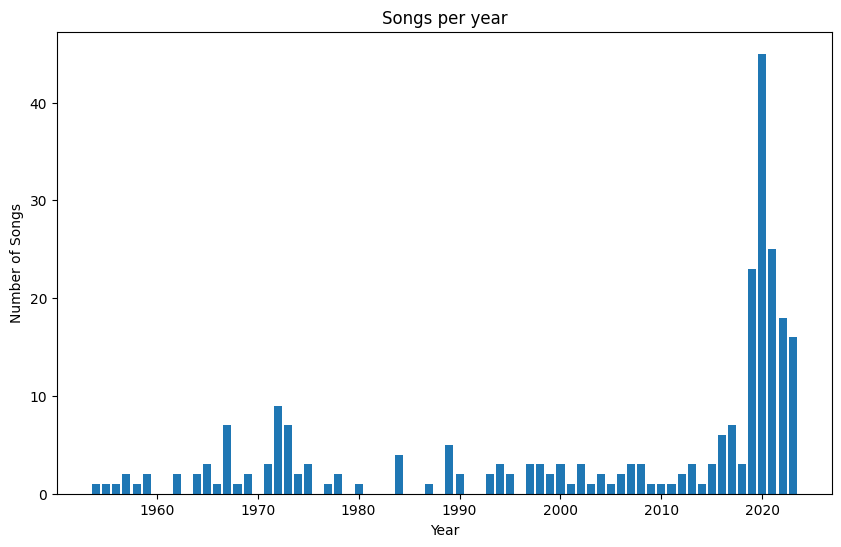

In [ ]:
#visualize number of songs (track_name) per year
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


In [ ]:
df["track_album_release_year"].min()

1954

In [ ]:
df["track_album_release_year"].max()

2023

the playlists are from 2019-2023 and the majority of the songs also seem to be within this time frame. At first glance, it looks like the playlists are supposed to be relevant for the respective years

##Popularity

In [ ]:
artist_popularity = df.groupby("track_artist")["artist_popularity"].mean()
artist_popularity.sort_values(ascending=False).head(20)

,artist_popularity
track_artist,
Billie Eilish,96.0
"Drake,Rihanna",96.0
"Bad Bunny,Bomba Estéreo",95.0
"Travis Scott,Young Thug,M.I.A.",94.0
"Yng Lvcas,Peso Pluma",93.0
"Kendrick Lamar,Blxst,Amanda Reifer",92.0
Kendrick Lamar,92.0
Rihanna,92.0
SZA,90.0


In [ ]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

,track_popularity
track_name,
Snooze,85.0
Best Part (feat. H.E.R.),84.0
Brown Eyed Girl,83.0
Dancing In the Dark,82.0
Fast Car,82.0
La Bebe - Remix,81.0
Ojitos Lindos,81.0
Could You Be Loved,80.0
The Chain - 2004 Remaster,80.0


In [ ]:
print("Average Track Popularity: ", track_popularity.mean())
print("Median Track Popularity: ", track_popularity.median())
print("Max Track Popularity: ", track_popularity.max())
print("Min Track Popularity: ", track_popularity.min())

Average Track Popularity:  42.148979591836735
Median Track Popularity:  46.0
Max Track Popularity:  85.0
Min Track Popularity:  0.0


In [ ]:
print("Average Artist Popularity: ", artist_popularity.mean())
print("Median Artist Popularity: ", artist_popularity.median())
print("Max Artist Popularity: ", artist_popularity.max())
print("Min Artist Popularity: ", artist_popularity.min())

Average Artist Popularity:  61.48076923076923
Median Artist Popularity:  65.0
Max Artist Popularity:  96.0
Min Artist Popularity:  0.0


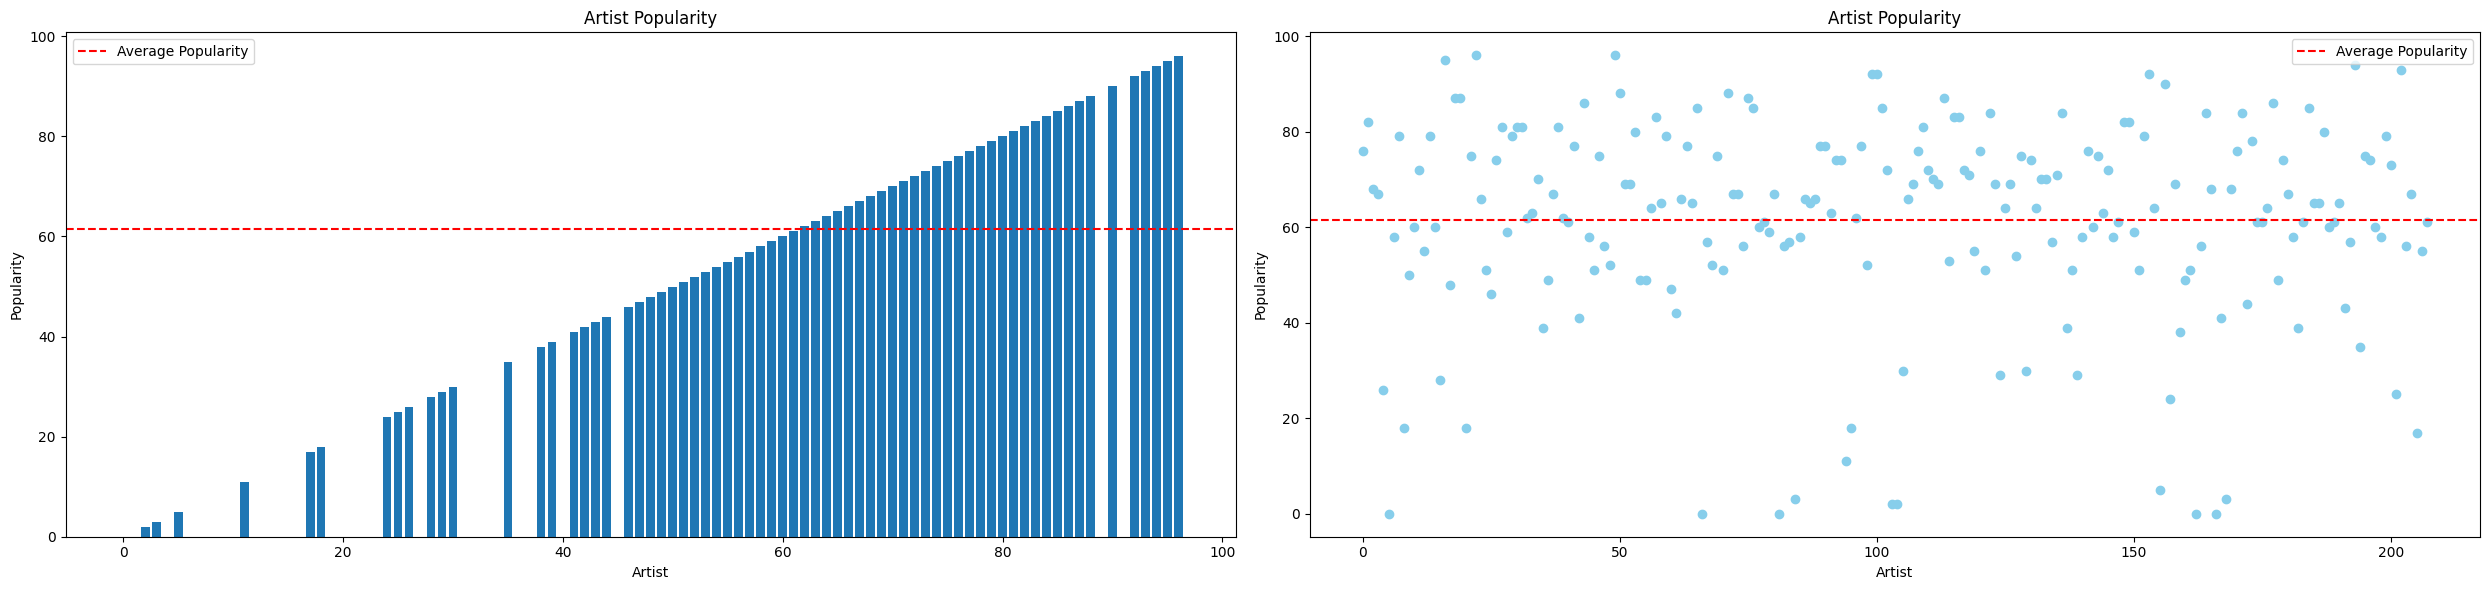

In [ ]:
# Set up the figure for Artist Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(artist_popularity, artist_popularity, color='#1f77b4')
ax1.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax1.set_xlabel('Artist')
ax1.set_ylabel('Popularity')
ax1.set_title('Artist Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(artist_popularity)), artist_popularity, color='skyblue')
ax2.axhline(y=artist_popularity.mean(), color='red', linestyle='--', label='Average Popularity')
ax2.set_xlabel('Artist')
ax2.set_ylabel('Popularity')
ax2.set_title('Artist Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

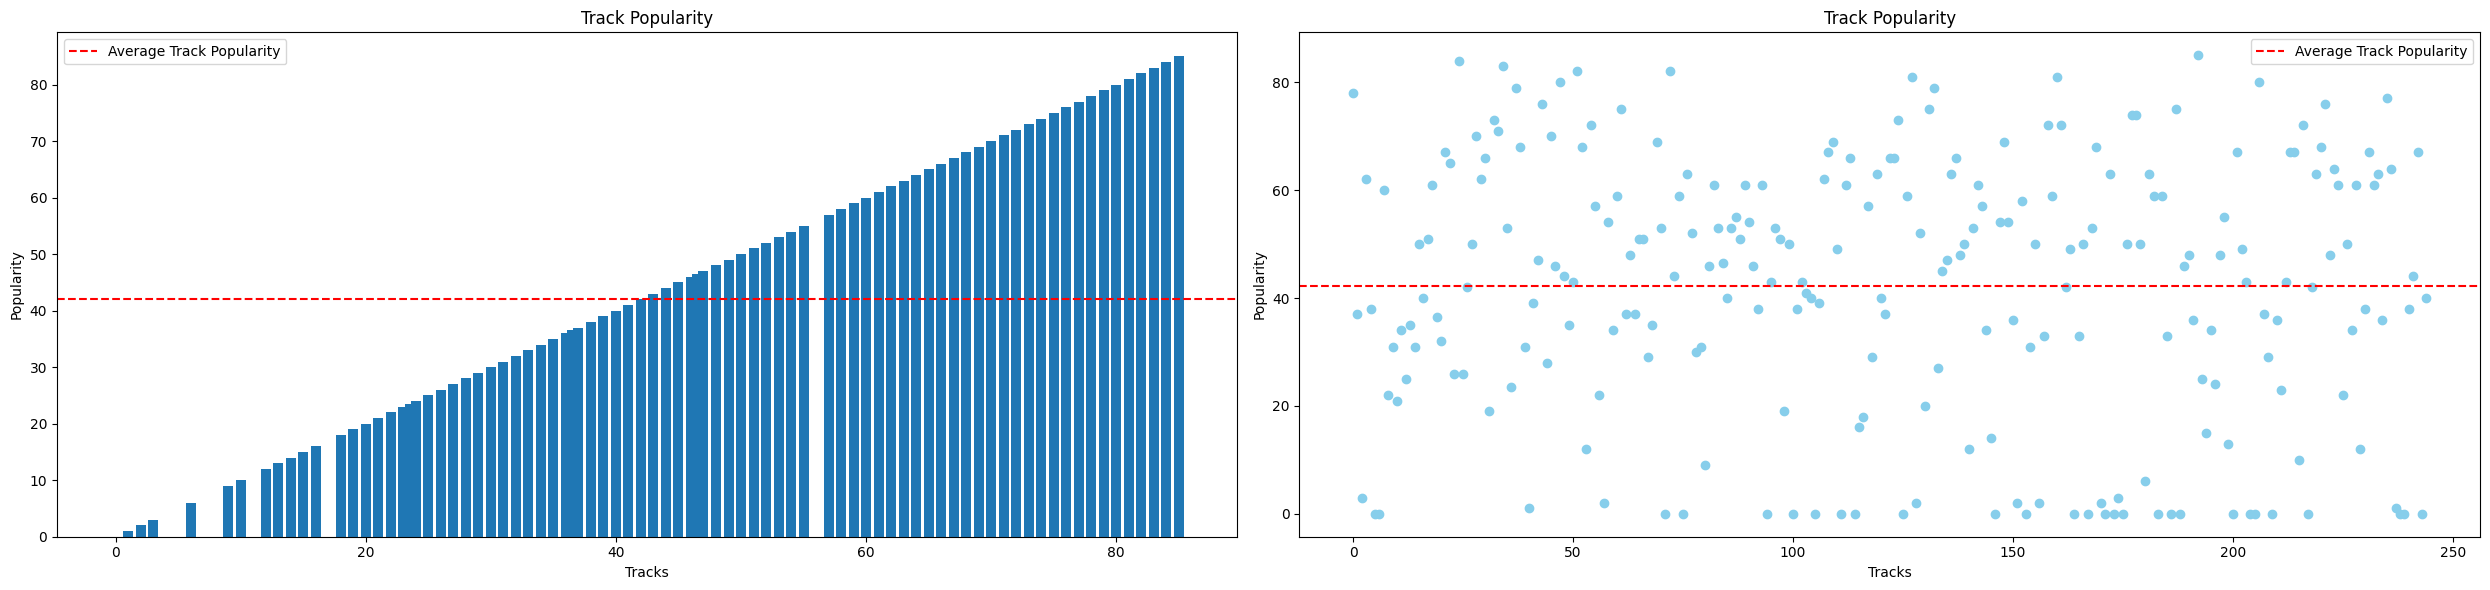

In [ ]:
# Set up the figure for Track Popularity with two subplots (barplot and scatterplot) side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Bar Plot on the first subplot
ax1.bar(track_popularity, track_popularity, color='#1f77b4')
ax1.axhline(y=track_popularity.mean(), color='red', linestyle='--', label='Average Track Popularity')
ax1.set_xlabel('Tracks')
ax1.set_ylabel('Popularity')
ax1.set_title('Track Popularity')
ax1.legend()

# Scatter Plot on the second subplot
ax2.scatter(range(len(track_popularity)), track_popularity, color='skyblue')
ax2.axhline(y=track_popularity.mean(), color='red', linestyle='--', label='Average Track Popularity')
ax2.set_xlabel('Tracks')
ax2.set_ylabel('Popularity')
ax2.set_title('Track Popularity')
ax2.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##Track Duration

Does Obama prefer short or long songs?

In [ ]:
df["duration_min"].mean()

3.8214901960784315

In [ ]:
df["duration_min"].median()

3.63

In [ ]:
df["duration_min"].min()

1.45

In [ ]:
df["duration_min"].max()

10.72

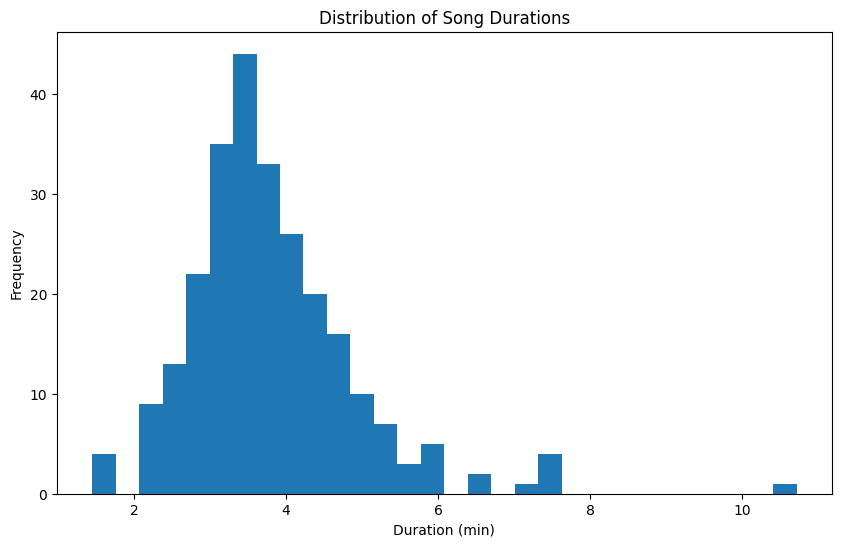

In [ ]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music Features

In [ ]:
df["danceability"].mean()

0.6341960784313725

In [ ]:
df["loudness"].mean()

-8.238

In [ ]:
df["valence"].mean()

0.5647058823529412

In [ ]:
df["time_signature"].value_counts()

,count
time_signature,
4,235
3,17
1,2
5,1


In [ ]:
df["mode"].value_counts()

,count
mode,
Major,148
minor,107


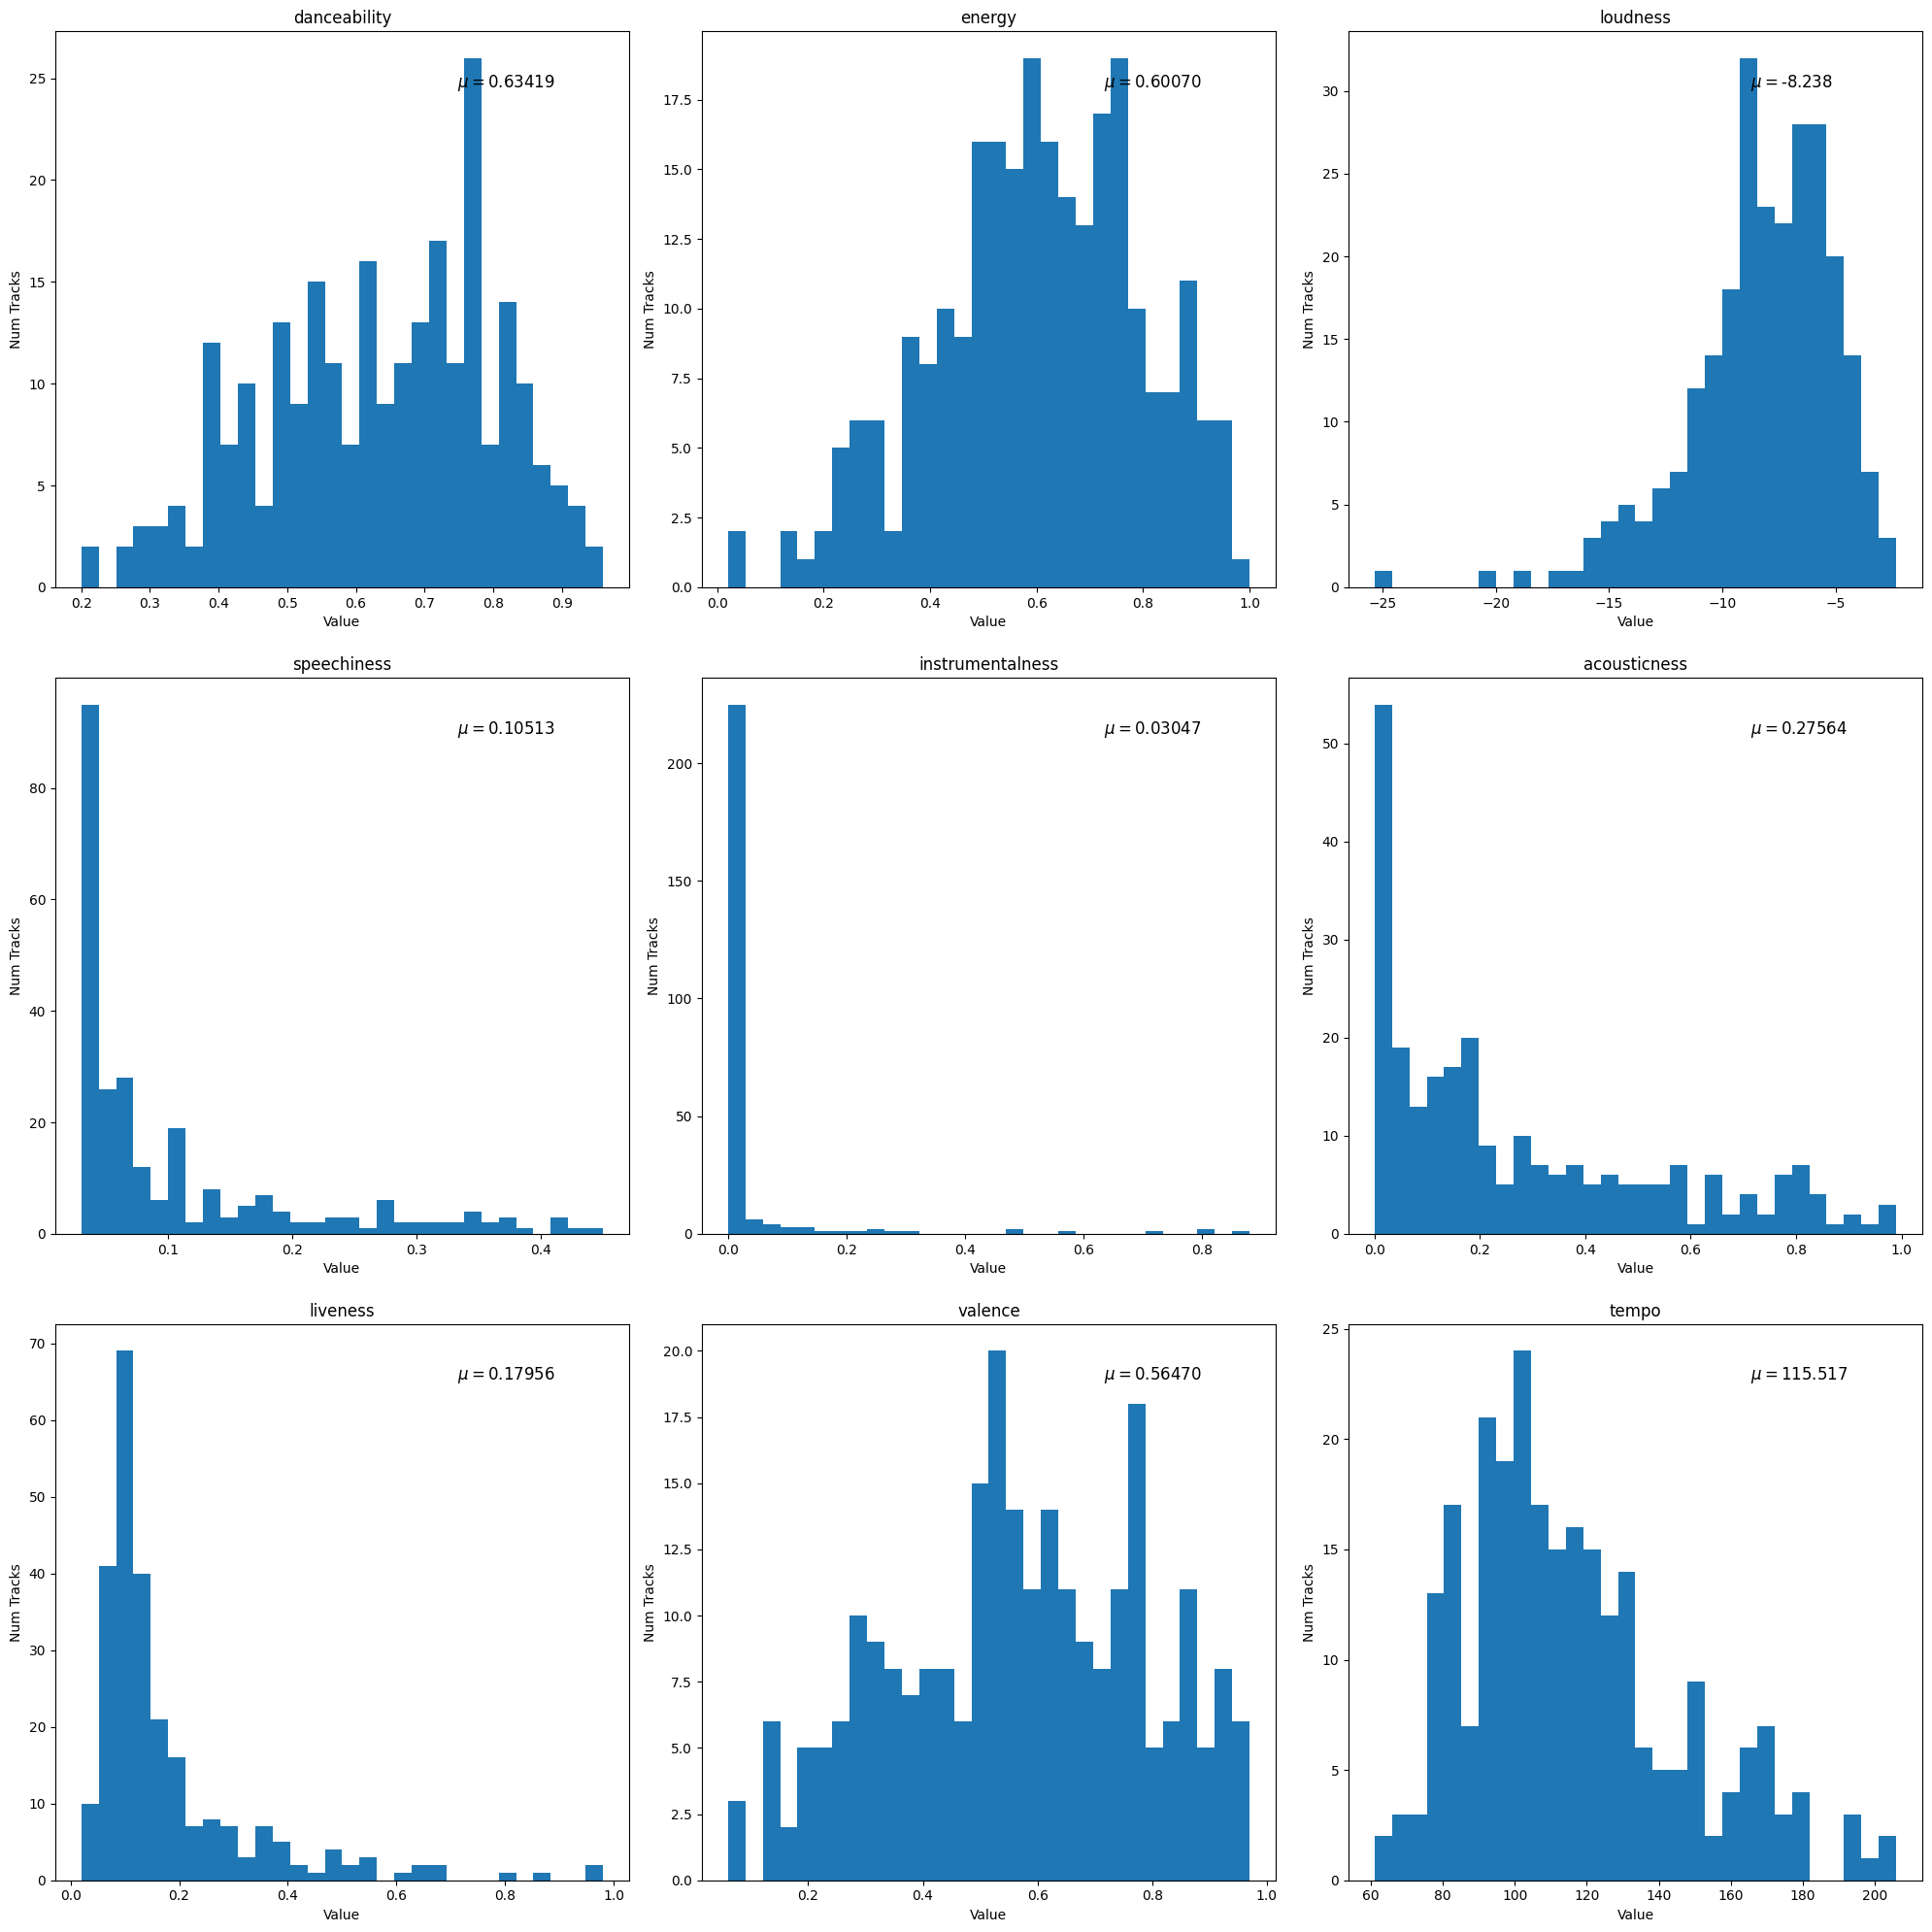

In [ ]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

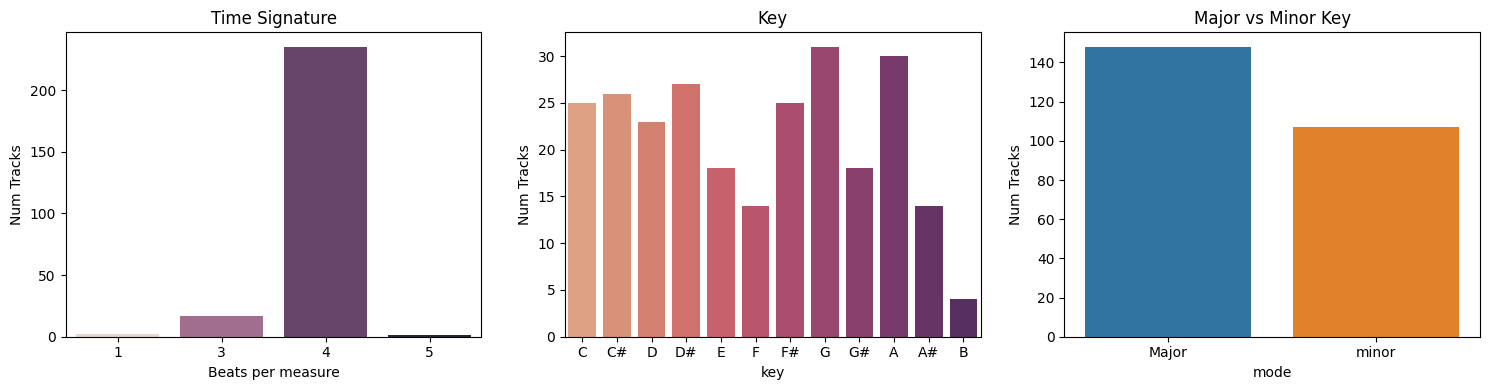

In [ ]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='time_signature', hue='time_signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key', hue='key', palette='flare', legend=False)
plt.xticks(ticks=pyplot.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('Key')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=pyplot.xticks()[0], labels=['Major', 'minor'])
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key');

plt.tight_layout(w_pad=2)

the vast majority of the tracks are in 4/4 time signature but interestingly enough the majority of the tracks are in G major, A major and D minor. About 2/3 of the tracks are in minor key. Maybe this is the reason for a relatively balanced valence of 0,56? Tracks in B major are obviously not very attractive to Obama.
